In [1]:
import os
from paths import *
from C_0D_allhidrep import *

In [2]:
eval_out_dir = os.path.join(model_save_, "eval-C_0D-0412203108")

In [3]:
zip(["ae", "aefixemb"], [["1", "4", "5"], ["1", "3", "4", "5"]])

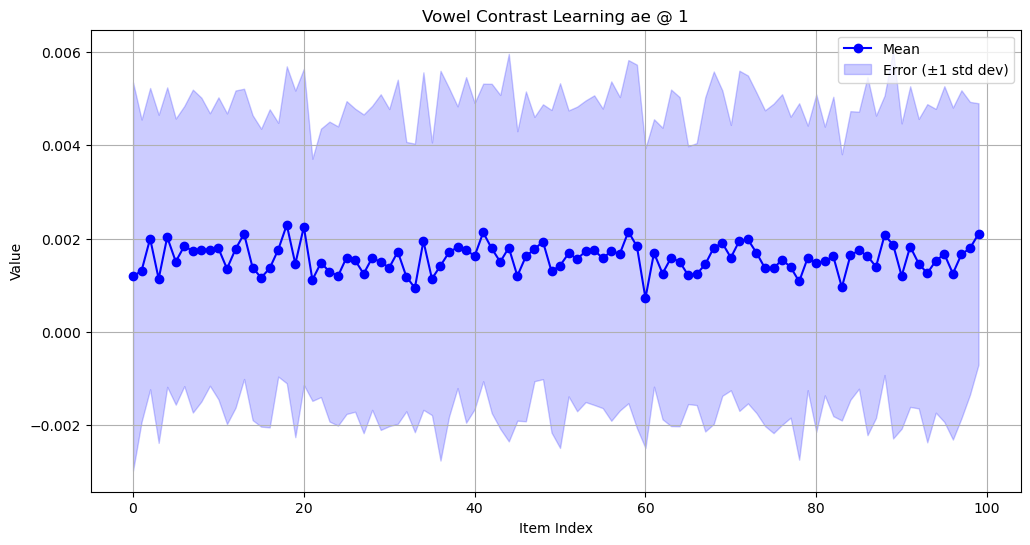

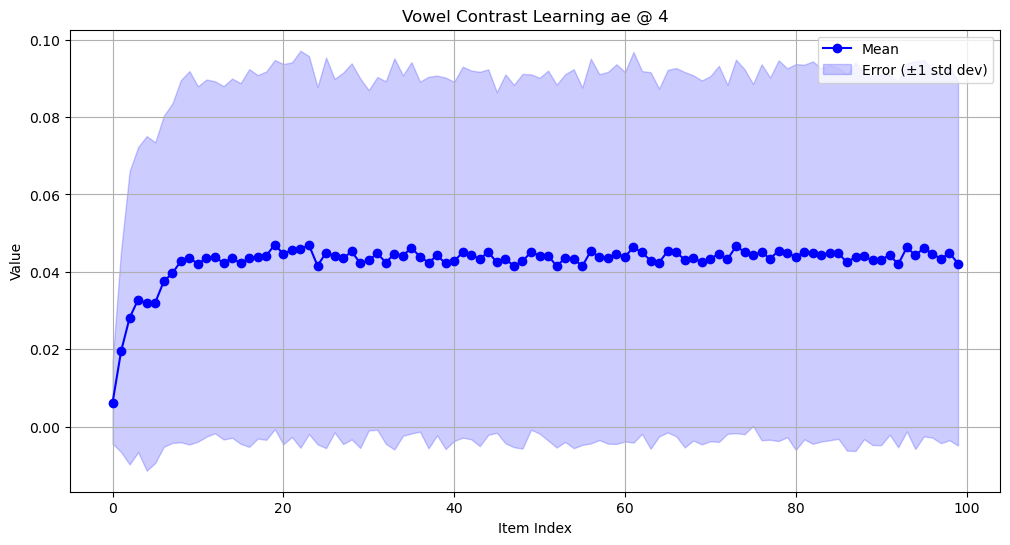

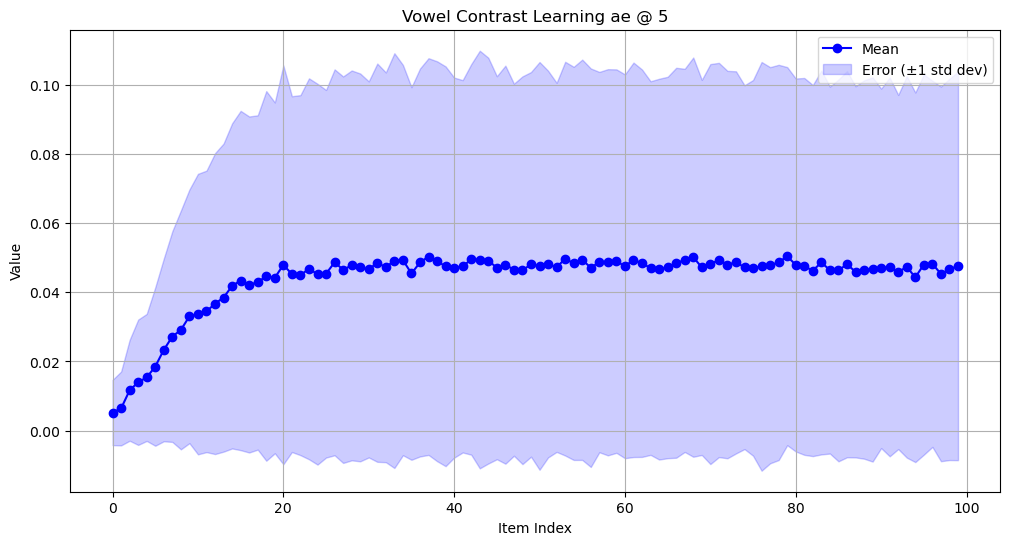

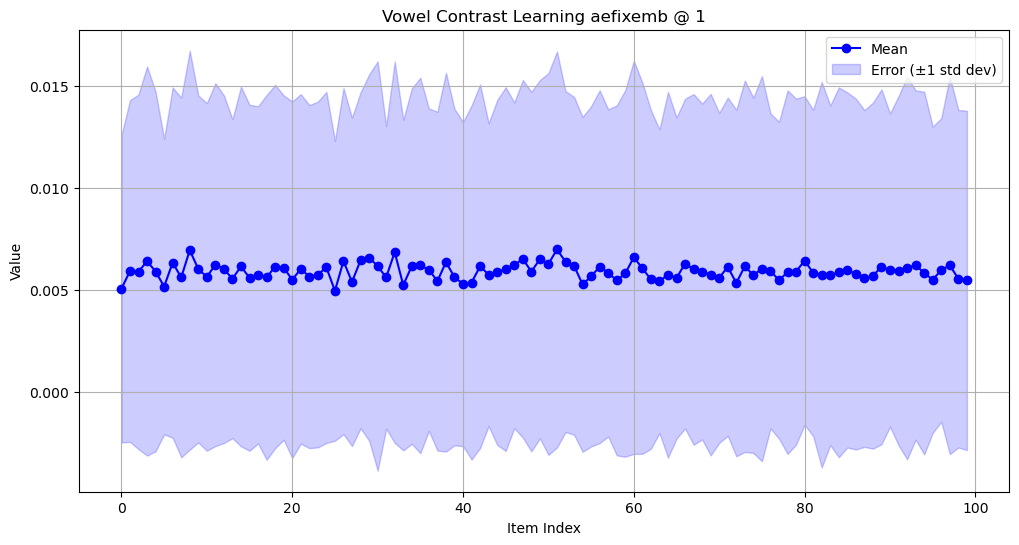

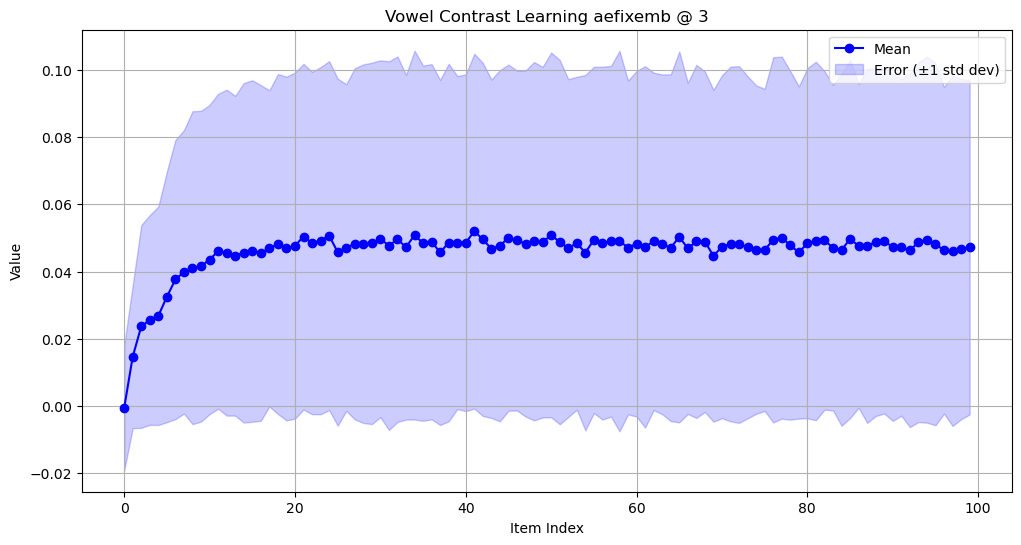

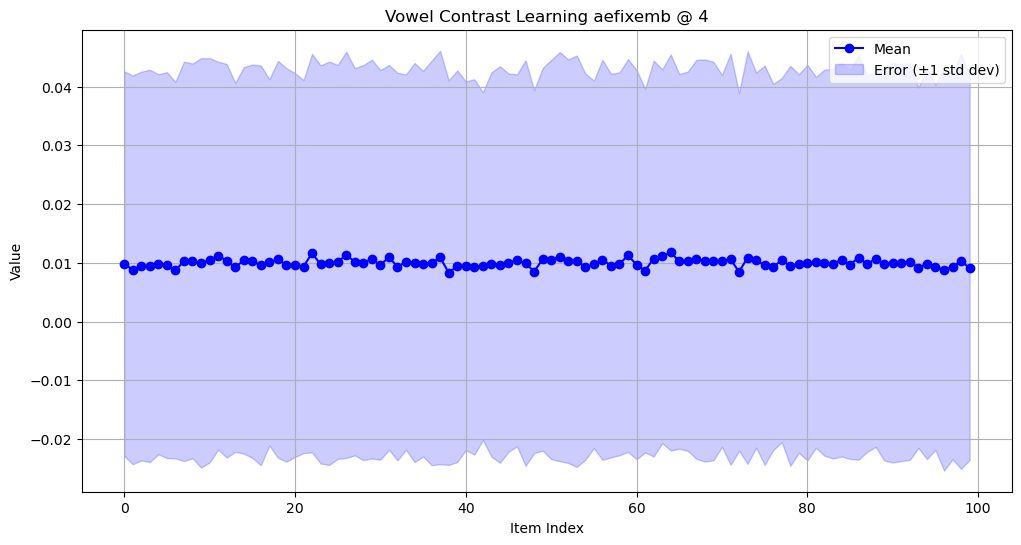

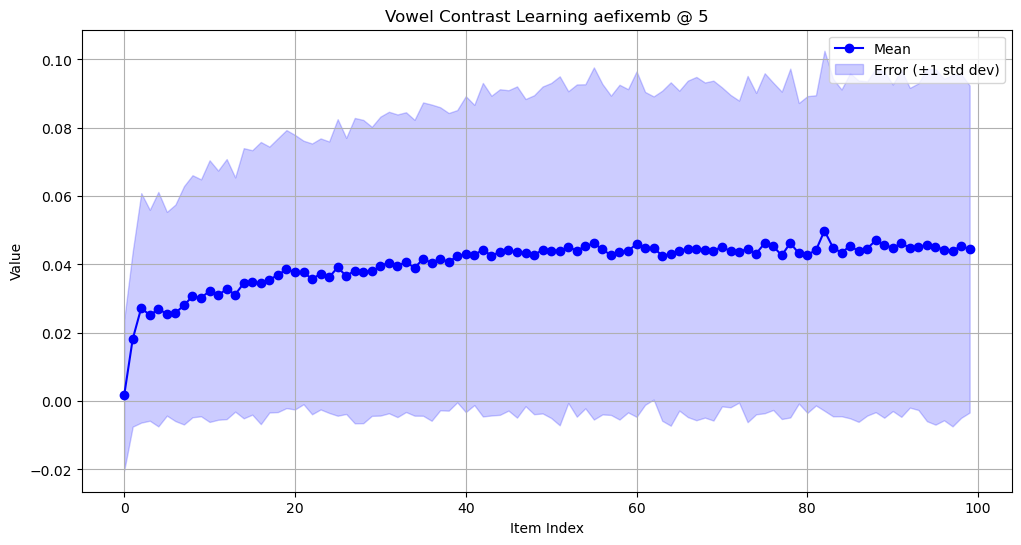

: 

In [6]:
for model_type, goodnums in zip(["ae", "aefixemb"], [["1", "4", "5"], ["1", "3", "4", "5"]]): 
    for condition in ["u"]:
        for model_num in goodnums: 
            res_save_dir = os.path.join(eval_out_dir, model_type, condition, str(model_num))
            sil_scores_99 = []
            for epoch in range(0, 100): 
                sil_score_path = os.path.join(res_save_dir, f"sil_scores_{epoch}.pk")
                with open(sil_score_path, "rb") as file: 
                    sil_scores = pickle.load(file)
                sil_scores_99.append(sil_scores)

            data = np.array(sil_scores_99)

            # Calculate the mean and standard deviation for each item
            means = np.mean(data, axis=1)
            std_devs = np.std(data, axis=1)

            # Create the plot
            plt.figure(figsize=(12, 6))

            # Plot the mean
            plt.plot(means, marker='o', linestyle='-', color='b', label='Mean')

            # Plot the error as a shaded area
            plt.fill_between(range(len(means)), means - std_devs, means + std_devs, color='b', alpha=0.2, label='Error (±1 std dev)')

            # Add title and labels
            plt.title(f'Vowel Contrast Learning {model_type} @ {model_num}')
            plt.xlabel('Item Index')
            plt.ylabel('Value')
            plt.legend()

            # Show the graph
            plt.grid(True)
            plt.show()